# Assignment 4
## Austin Peng
## CSC 241
--------------------
## Questions
- A) is it right
- C) 67% of 10 d runs correct OR check if each individual d is 67% correct


In [7]:
# IMPORTS
%matplotlib inline
import numpy as np
import math, sys
from pylab import *
from tqdm import tqdm
import time
style.use('seaborn-whitegrid')
rcParams['figure.figsize'] = [20, 8]

# A)
____

f(c, phi) where c=contrast, phi=orientation

delta phi = 90 degrees | So phi1=-45 phi2=45, phi1=0 phi2=90 etc

w is the same in #A

In [2]:
#1
n=100
k=1
f_max=20
f0=5
phi=1


# method for pop. response f(c, phi) 
# THIS FUNCTION TAKES phi_I AS INPUT TO GENERATE VALUES FOR A SET phi OVER 0 TO PI
def population_response(c, phi_I):
    response = f0 + c* f_max * math.exp(k *( math.cos(2*(math.radians(phi) - phi_I)) - 1) )
    return response



# range
plot_range = np.linspace(0, math.pi, n)

C determines the height or strength of the population response.
As phi increases, the response curves shift towards the right. Phi affects the popluation responses horizontal orientation.

In [3]:
#2
# Need to create a 100x100 matrix with diagonal as f(c, phi) where c = 1 and phi goes from range (0 to pi) over 100 increments
# This is a sample of 100 neurons

C= np.zeros((100,100), dtype=float)
phi=0
count=0
for x in plot_range:
    C[count][count] = population_response(0,x) 
    count+=1

In [4]:
# C = 100x100 matrix from #2 but inverse
C_inverse=[]
for x in range(0,100):
    C_inverse.append(C[x] / (C[x][x]**2))
    
# convert back to np array
C_inverse = np.asarray(C_inverse)

[[ 0.00000000e+00  1.86784016e-01  3.73561989e-01  5.60303857e-01
   7.46932212e-01  9.33300340e-01  1.11917231e+00  1.30420585e+00
   1.48793854e+00  1.66977819e+00  1.84899774e+00  2.02473534e+00
   2.19599986e+00  2.36168213e+00  2.52057184e+00  2.67137983e+00
   2.81276536e+00  2.94336757e+00  3.06184010e+00  3.16688760e+00
   3.25730285e+00  3.33200282e+00  3.39006218e+00  3.43074271e+00
   3.45351729e+00  3.45808727e+00  3.44439242e+00  3.41261293e+00
   3.36316341e+00  3.29667915e+00  3.21399527e+00  3.11611993e+00
   3.00420264e+00  2.87949929e+00  2.74333537e+00  2.59706899e+00
   2.44205508e+00  2.27961228e+00  2.11099346e+00  1.93736080e+00
   1.75976622e+00  1.57913725e+00  1.39626868e+00  1.21181984e+00
   1.02631707e+00  8.40161243e-01  6.53639524e-01  4.66940898e-01
   2.80174795e-01  9.33921028e-02 -9.33921028e-02 -2.80174795e-01
  -4.66940898e-01 -6.53639524e-01 -8.40161243e-01 -1.02631707e+00
  -1.21181984e+00 -1.39626868e+00 -1.57913725e+00 -1.75976622e+00
  -1.93736

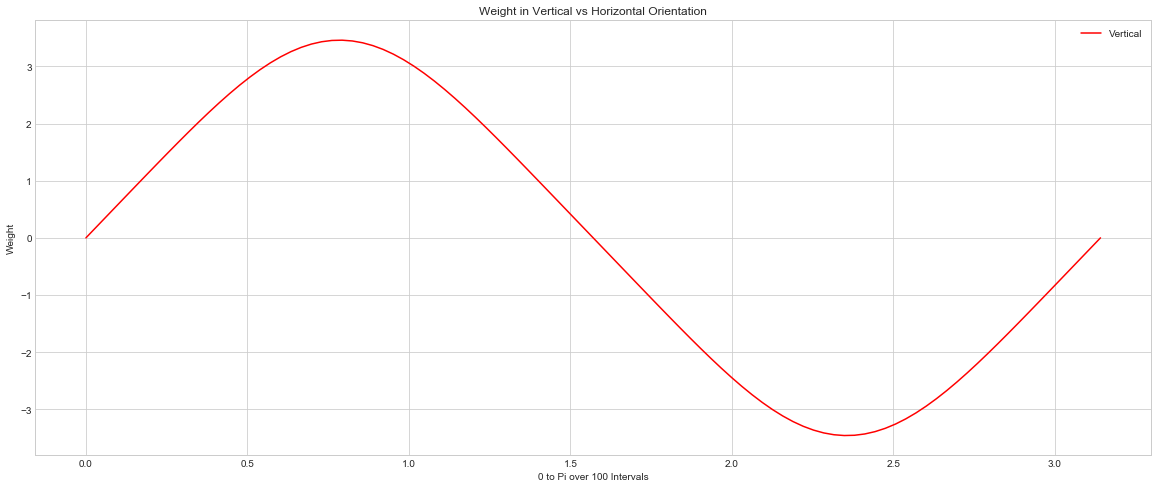

In [40]:
#3
# W (100x1) = C-1 (100x100) * ( f1 (100x1) - f2 (100x1))
# Make the difference b/w phi and phi2 go from 0 to 10
# phi_i is still 0 to Pi. 

# this is f2 which is 100x1 and is constant, f1 changes to represent delta phi


phi = 45
f1=[]
for y in plot_range:
    f1.append(population_response(1, y))
f1 = np.asarray(f1)    

phi = -45
f2=[]
for y in plot_range:
    f2.append(population_response(1, y))
f2 = np.asarray(f2)    

w = []
w.append( np.matmul(C_inverse, f1 - f2) ) 

# set as np array
w=np.asarray(w)

print(w)
    
    
title("Weight in Vertical vs Horizontal Orientation")
xlabel("0 to Pi over 100 Intervals")
ylabel("Weight")
plot(plot_range, w[0], 'r', label='Vertical')
legend(loc='upper right')
show()

# B)
____

r = poiss( f() )

d = W*r

10ms time bins till 1 second so run 100 times.

At each t, draw new r and sum all d up till that t. 

*** Function f() is not varied, just gen new poiss***

Ex: for t = 3, d(3) = W*r(1) + W*r(2) + W*r(3) 

Ex: for t = 1, d(1) = W*r(1)

[[ 0.          0.00186784  0.00373562  0.00560304  0.00746932  0.009333
   0.01119172  0.01304206  0.01487939  0.01669778  0.01848998  0.02024735
   0.02196     0.02361682  0.02520572  0.0267138   0.02812765  0.02943368
   0.0306184   0.03166888  0.03257303  0.03332003  0.03390062  0.03430743
   0.03453517  0.03458087  0.03444392  0.03412613  0.03363163  0.03296679
   0.03213995  0.0311612   0.03004203  0.02879499  0.02743335  0.02597069
   0.02442055  0.02279612  0.02110993  0.01937361  0.01759766  0.01579137
   0.01396269  0.0121182   0.01026317  0.00840161  0.0065364   0.00466941
   0.00280175  0.00093392 -0.00093392 -0.00280175 -0.00466941 -0.0065364
  -0.00840161 -0.01026317 -0.0121182  -0.01396269 -0.01579137 -0.01759766
  -0.01937361 -0.02110993 -0.02279612 -0.02442055 -0.02597069 -0.02743335
  -0.02879499 -0.03004203 -0.0311612  -0.03213995 -0.03296679 -0.03363163
  -0.03412613 -0.03444392 -0.03458087 -0.03453517 -0.03430743 -0.03390062
  -0.03332003 -0.03257303 -0.03166888 -0.

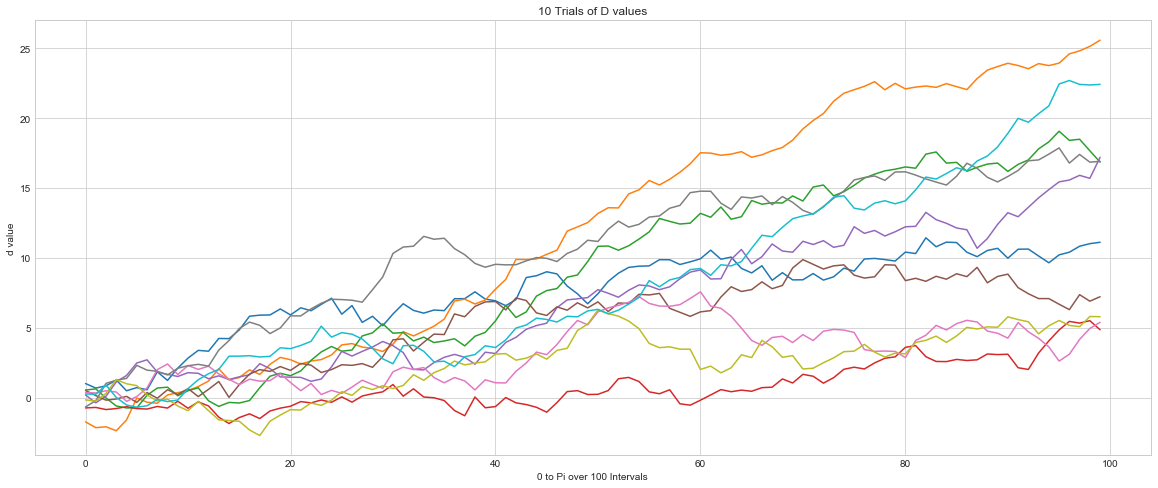

In [57]:
time_range=range(0,100)

# 'f' values, where c=0
c=0.01
phi = 45
f1=[]
for y in plot_range:
    f1.append(population_response(c, y))
f1 = np.asarray(f1)    

phi = -45
f2=[]
for y in plot_range:
    f2.append(population_response(c, y))
f2 = np.asarray(f2) 

w = []
w.append( np.matmul(C_inverse, f1 - f2) ) 

# set as np array
w=np.asarray(w)

print(w)



# function to calc a new r value
def new_r():
    return np.random.poisson(f1)


def find_d():
    # create new list of d values
    d_list=[]
    for x in time_range:
        d_list.append(np.matmul(w[0], new_r() ))

    # bushwack summation loop
    d_summation=[]
    for x in time_range:
        if(x==0):
            d_summation.append(d_list[x])
        else:
            summation=0
            for y in range(0, x+1):
                summation+= d_list[x-y]
            d_summation.append(summation)        

    return np.asarray(d_summation)


d_experiments=[]
for x in range(0, 10):
    d_experiments.append(find_d())
    

title("10 Trials of D values")
xlabel("0 to Pi over 100 Intervals")
ylabel("d value")

for x in d_experiments:
    plot(time_range, x)

show()

# C)
____

C* = value of contrast where percent correct is 66%.
Find 66% correct level. If D>0 correct, else decision is wrong.

In [ ]:
# def find_number_correct(experiments):
#     total=0
#     for experiment in experiments:
#         number_correct=0
#         for y in experiment:
#             if(y>0):
#                 number_correct+=1
#     return number_correct


print(find_number_correct(d_experiments))

# D)
____

Psychometric function = (percent correct as a function of contrast c) 

Run loop from 0 to 3 * C*. Plot percentage correct (C*) over contrast.


# E)
____

Find value B (bound) where about 3/4 of the decistions have been made before t=1.

# F)
____

# G)
____

# H)
____